 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [222]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [223]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df= pd.read_csv(whale_returns_csv,index_col='Date',
                      infer_datetime_format=True,
                      parse_dates=True)

In [224]:
# Count nulls
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [225]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [226]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df= pd.read_csv(algo_returns_csv,
                    index_col='Date',
                    infer_datetime_format=True,
                    parse_dates=True)

In [227]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [228]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [229]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df=pd.read_csv(sp500_history_csv,
                    index_col="Date",
                    infer_datetime_format=True,
                    parse_dates=True)

In [230]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [231]:
# Fix Data Types
sp500_df['Close']= sp500_df['Close'].str.replace("$","").astype(float)

In [232]:
# Calculate Daily Returns
sp500_df= sp500_df.pct_change()
sp500_df

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [233]:
# Drop nulls
sp500_df.dropna(inplace=True)

In [234]:
# Rename Column
sp500_df.rename(columns={'Close':"SP500"},inplace=True)
sp500_df

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [235]:
# Concatenate all DataFrames into a single DataFrame
combined_df=pd.concat([whale_df,algo_df,sp500_df],
                      axis="columns",
                     join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

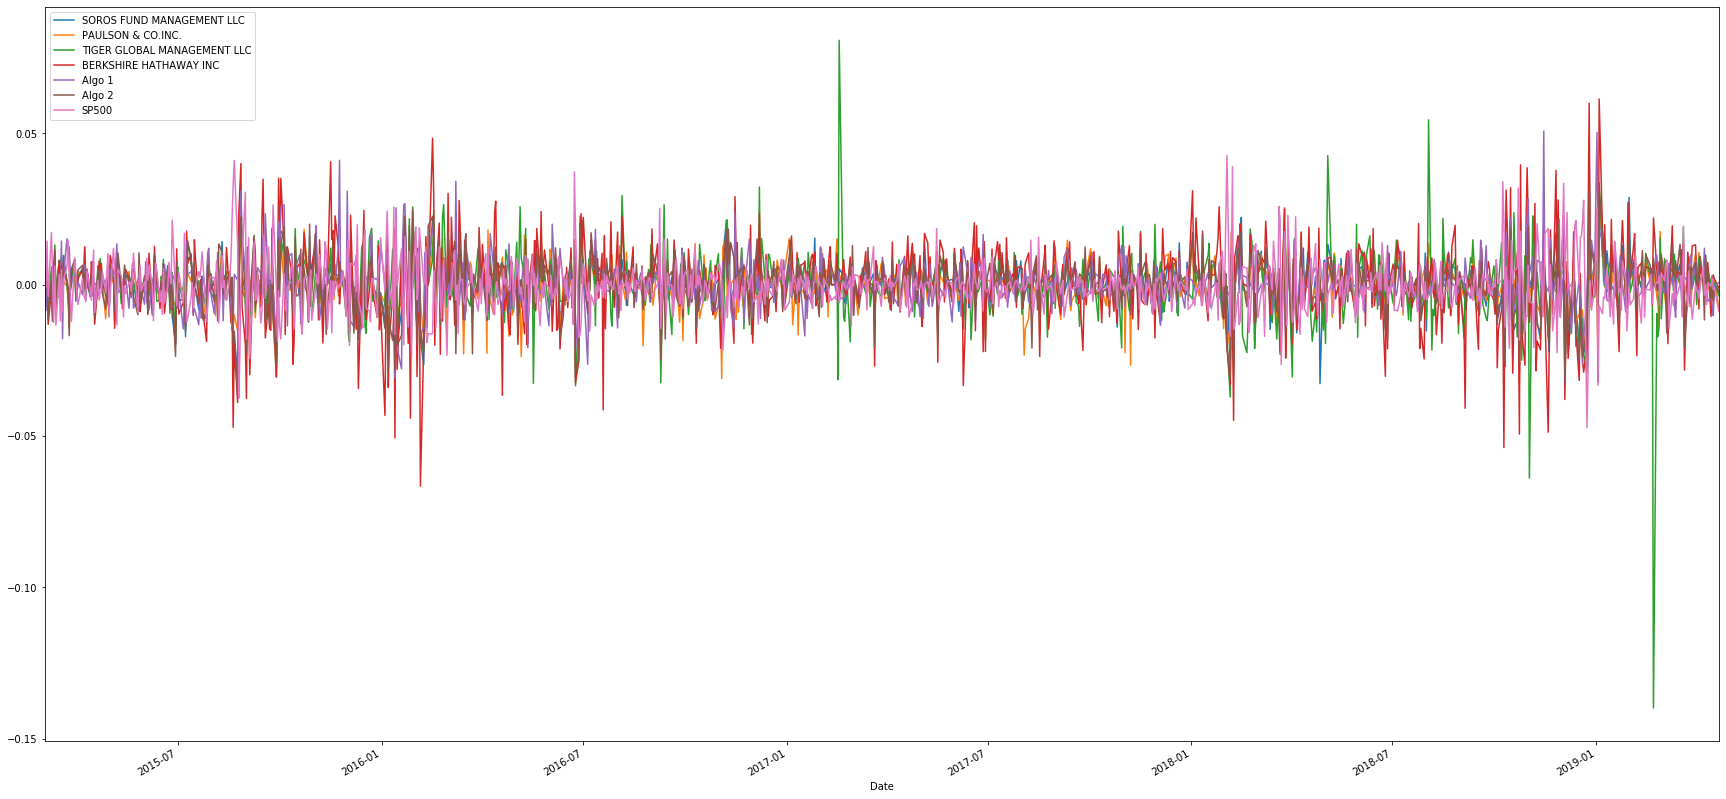

In [236]:
# Plot daily returns
combined_df.plot(figsize=(30,15))

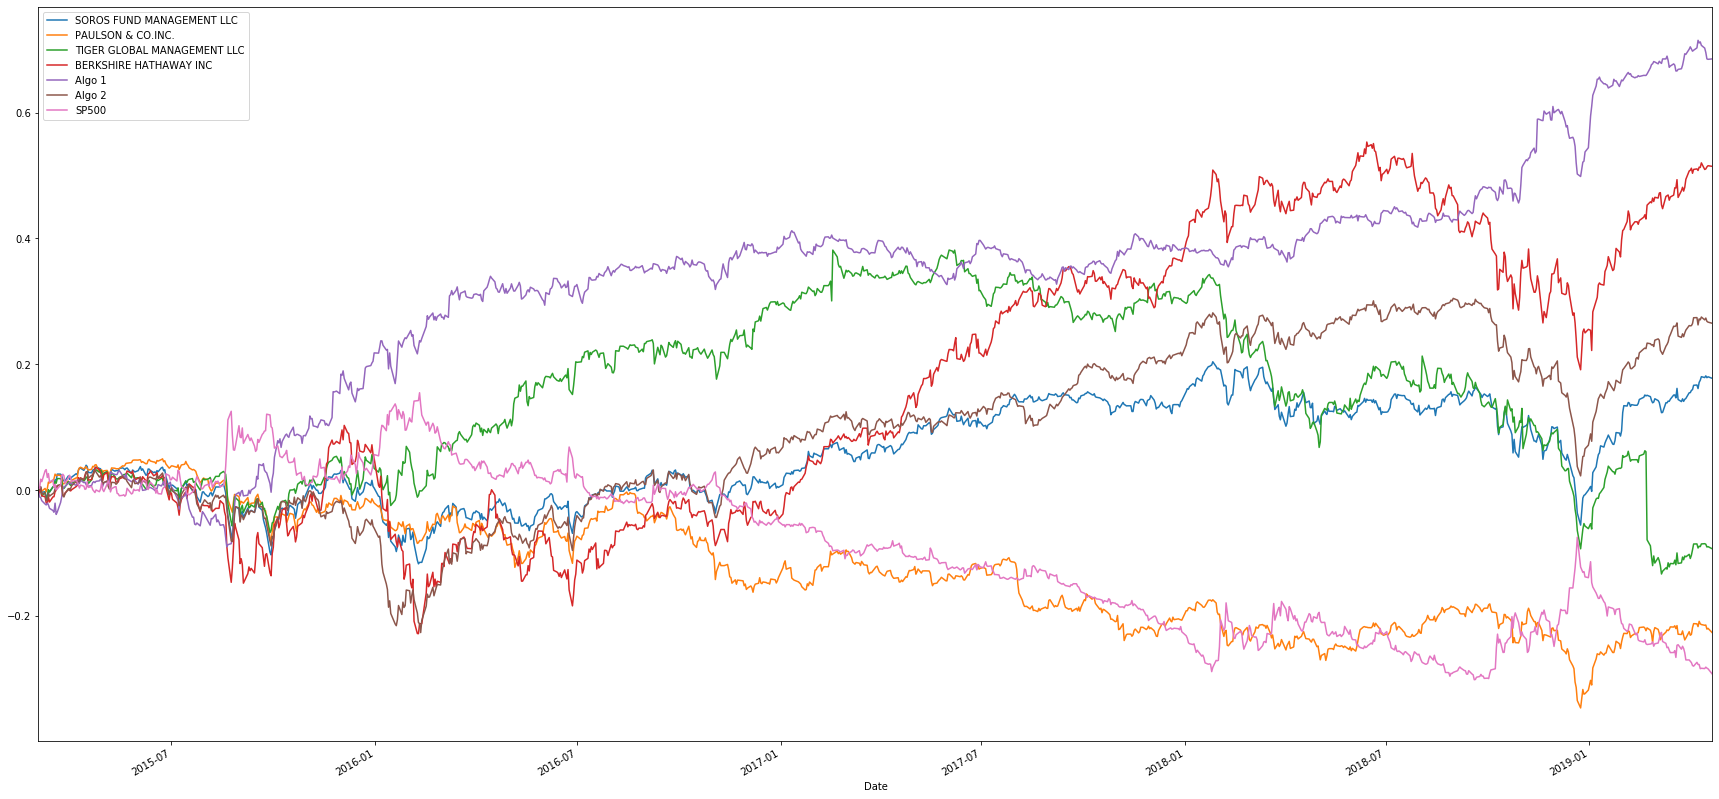

In [237]:
# Plot cumulative returns
combined_df.cumsum().plot(figsize=(30,15))


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

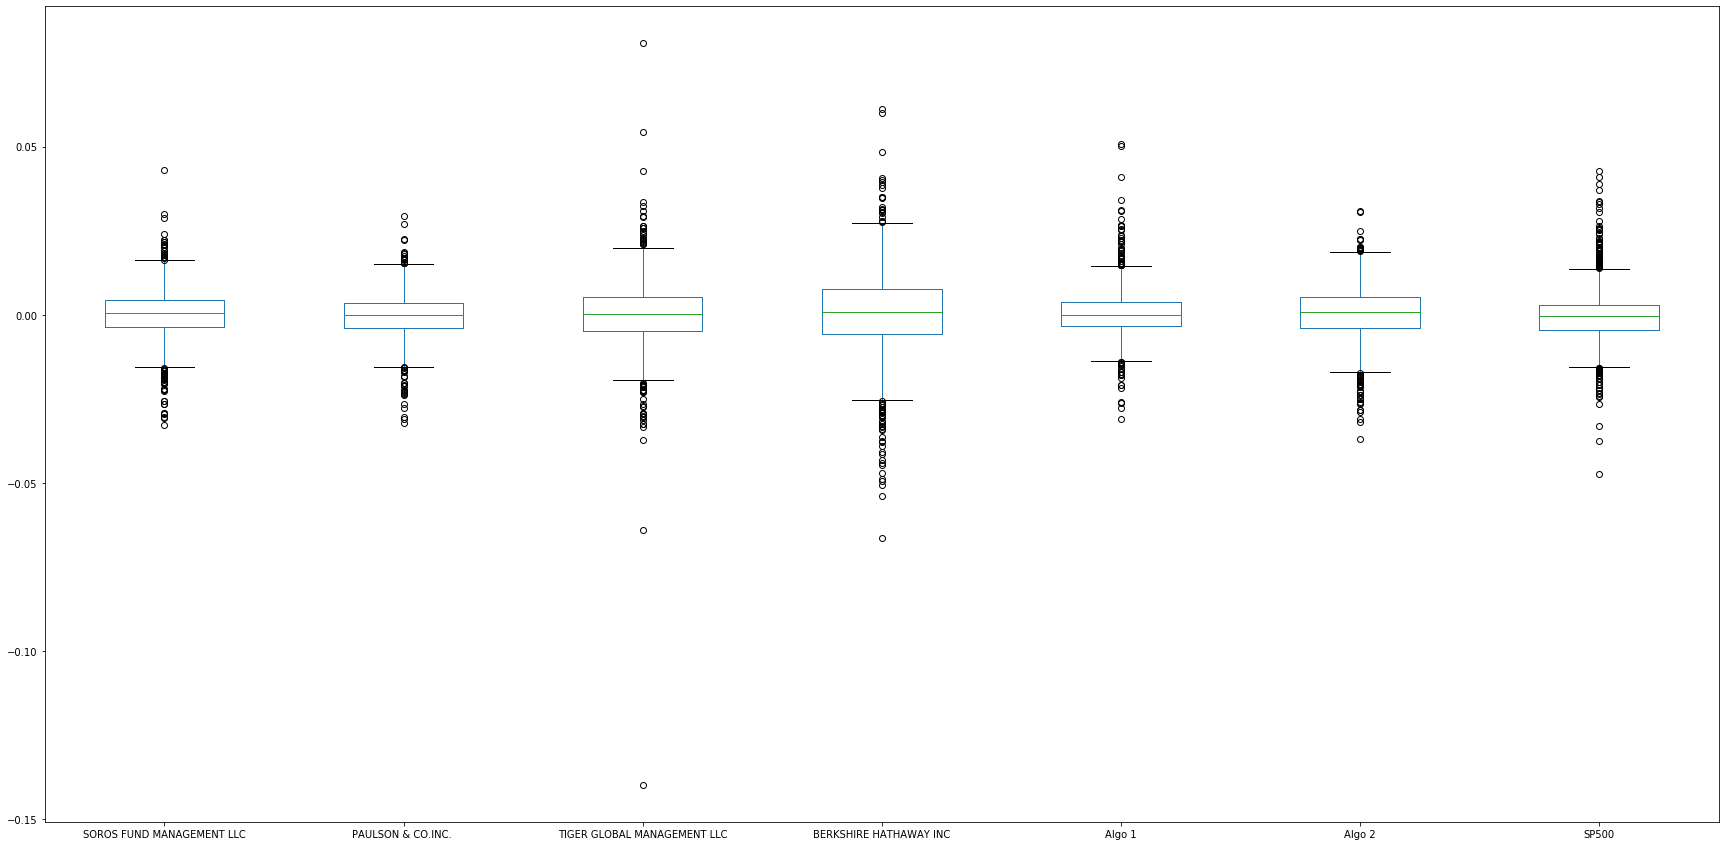

In [238]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(30,15))

In [239]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
std_df=combined_df.std()
std_df

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

In [240]:
# Determine which portfolios are riskier than the S&P 500


In [241]:
# Calculate the annualized standard deviation (252 trading days)
annualized_df=combined_df.std()*np.sqrt(252)
annualized_df

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

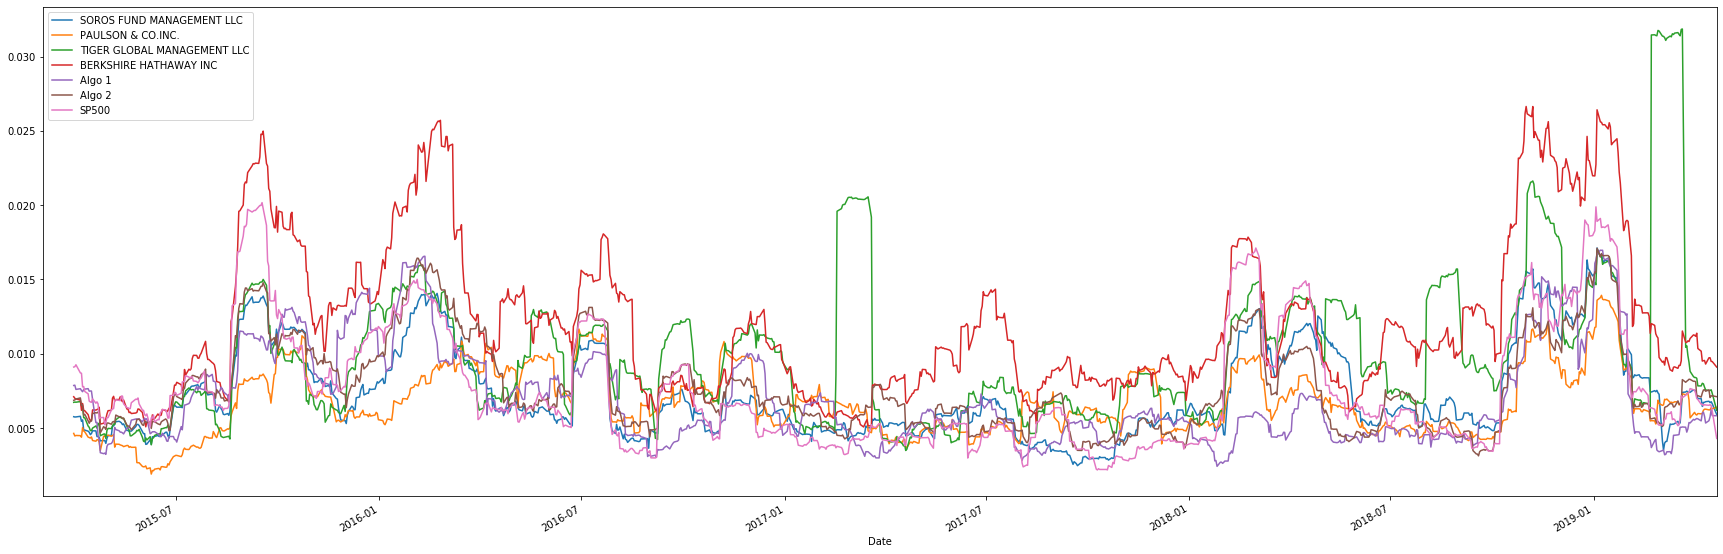

In [242]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
rolling_df=combined_df.rolling(window=21).std().plot(figsize=(30,10))
rolling_df

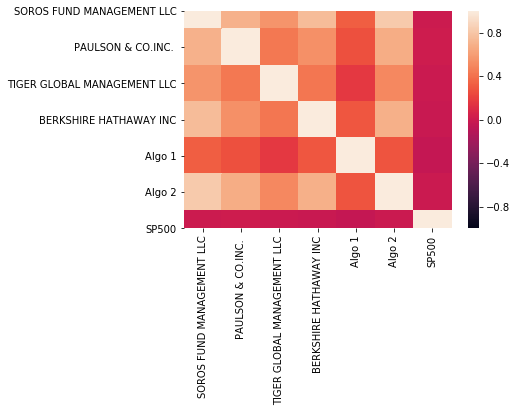

In [243]:
# Correlation
correlation_df=combined_df.corr()
sns.heatmap(correlation_df,vmin=-1,vmax=1)

-0.030149214542337772
AxesSubplot(0.125,0.2;0.775x0.68)


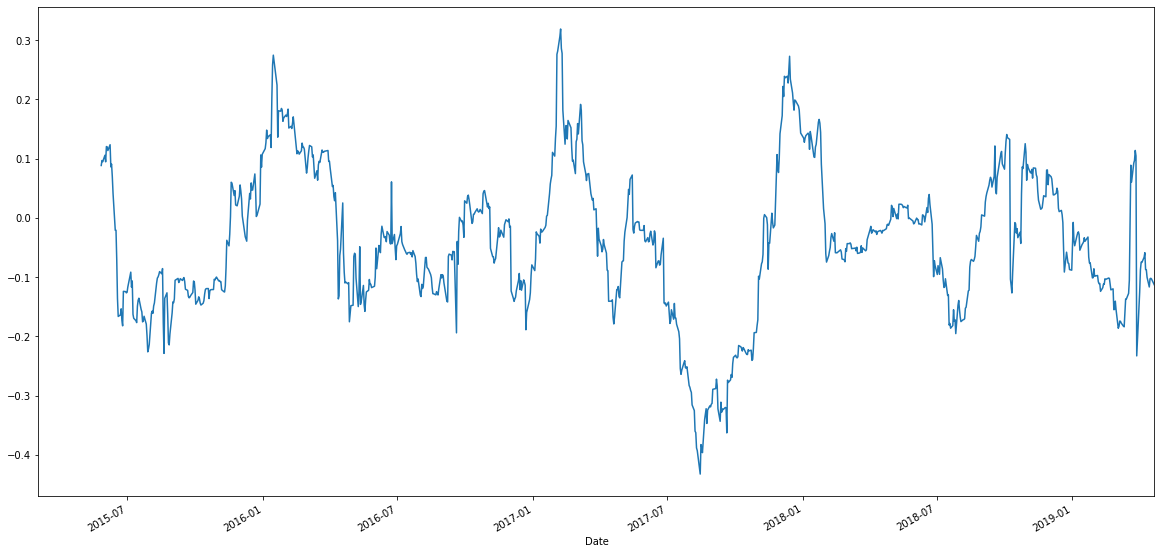

In [244]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance= combined_df["Algo 1"].cov(combined_df["SP500"])
variance= combined_df["SP500"].var()
algo_beta= covariance/variance
rolling_algol_covariance= combined_df["Algo 1"].rolling(window=60).cov(combined_df["SP500"])
rolling_variance= combined_df["SP500"].rolling(window=60).var()
rolling_algol_beta= rolling_algol_covariance/rolling_variance
rolling_beta_plot= rolling_algol_beta.plot(figsize=(20,10))
print(algo_beta)
print(rolling_beta_plot)

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [245]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [246]:
# Annualzied Sharpe Ratios
annualized_sharpe_df = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
annualized_sharpe_df

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

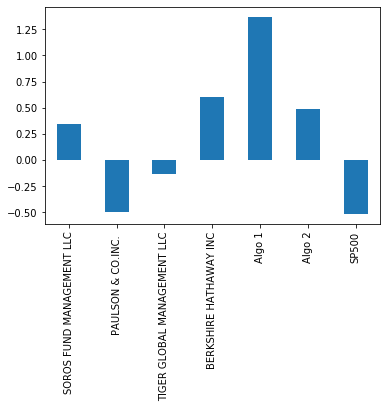

In [247]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_df.plot(kind="bar")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [248]:
# Read the first stock
BYND_csv = Path("Resources/BYND_google_fin.csv")
BYND_df = pd.read_csv(BYND_csv,
                      index_col='Date',
                      infer_datetime_format=True,
                      parse_dates=True)
BYND_df.head()

,Close
Date,
2019-05-02,65.75
2019-05-03,66.79
2019-05-06,74.79
2019-05-07,79.17
2019-05-08,72.25


In [249]:
# Read the second stock
BIP_csv = Path("Resources/BIP_google_fin.csv")
BIP_df = pd.read_csv(BIP_csv,
                      index_col='Date',
                      infer_datetime_format=True,
                      parse_dates=True)
BIP_df.head()

,Close
Date,
2019-01-02,34.96
2019-01-03,35.40
2019-01-04,36.08
2019-01-07,36.77
2019-01-08,37.06


In [250]:
# Read the third stock
CGC_csv = Path("Resources/CGC_google_fin.csv")
CGC_df = pd.read_csv(CGC_csv,
                      index_col='Date',
                      infer_datetime_format=True,
                      parse_dates=True)
CGC_df.head()

,Close
Date,
2019-01-02,28.92
2019-01-03,28.11
2019-01-04,28.23
2019-01-07,28.90
2019-01-08,29.64


In [251]:
# Concatenate all stocks into a single DataFrame
Fin_portfolio_df = pd.concat([BYND_df, BIP_df, CGC_df],
                             axis="columns",
                             join="inner"
)
Fin_portfolio_df.columns = ["Beyond Meat",
                                "Brookfield Infrastructure",
                                "Canopy Growth"]
Fin_portfolio_df

,Beyond Meat,Brookfield Infrastructure,Canopy Growth
Date,,,
2019-05-02,65.75,41.10,48.46
2019-05-03,66.79,41.70,49.08
2019-05-06,74.79,41.65,49.20
2019-05-07,79.17,41.28,47.55
2019-05-08,72.25,41.28,48.04
...,...,...,...
2019-12-23,77.74,49.14,19.74
2019-12-24,77.73,49.63,19.96
2019-12-26,76.40,49.89,19.22


In [252]:
# Reset the index
Fin_portfolio_df.reset_index()
Fin_portfolio_df

,Beyond Meat,Brookfield Infrastructure,Canopy Growth
Date,,,
2019-05-02,65.75,41.10,48.46
2019-05-03,66.79,41.70,49.08
2019-05-06,74.79,41.65,49.20
2019-05-07,79.17,41.28,47.55
2019-05-08,72.25,41.28,48.04
...,...,...,...
2019-12-23,77.74,49.14,19.74
2019-12-24,77.73,49.63,19.96
2019-12-26,76.40,49.89,19.22


In [253]:
# Drop Nulls
Fin_portfolio_df.dropna(inplace=True)
Fin_portfolio_df

,Beyond Meat,Brookfield Infrastructure,Canopy Growth
Date,,,
2019-05-02,65.75,41.10,48.46
2019-05-03,66.79,41.70,49.08
2019-05-06,74.79,41.65,49.20
2019-05-07,79.17,41.28,47.55
2019-05-08,72.25,41.28,48.04
...,...,...,...
2019-12-23,77.74,49.14,19.74
2019-12-24,77.73,49.63,19.96
2019-12-26,76.40,49.89,19.22


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [254]:
# Calculate weighted portfolio returns
Fin_portfolio_returns_df = Fin_portfolio_df.pct_change()
Fin_portfolio_returns_df.dropna(inplace=True)
Fin_portfolio_returns_df

,Beyond Meat,Brookfield Infrastructure,Canopy Growth
Date,,,
2019-05-03,0.015817,0.014599,0.012794
2019-05-06,0.119778,-0.001199,0.002445
2019-05-07,0.058564,-0.008884,-0.033537
2019-05-08,-0.087407,0.000000,0.010305
2019-05-09,-0.055087,0.003149,-0.024355
...,...,...,...
2019-12-23,0.011713,0.016129,-0.014970
2019-12-24,-0.000129,0.009972,0.011145
2019-12-26,-0.017111,0.005239,-0.037074


In [255]:
weights = [1/3, 1/3, 1/3]
Agg_Fin_portfolio_returns_df = Fin_portfolio_returns_df.dot(weights)
Agg_Fin_portfolio_returns_df

Date
2019-05-03    0.014403
2019-05-06    0.040341
2019-05-07    0.005381
2019-05-08   -0.025701
2019-05-09   -0.025431
                ...   
2019-12-23    0.004291
2019-12-24    0.006996
2019-12-26   -0.016315
2019-12-27   -0.001819
2019-12-30   -0.017577
Length: 167, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [265]:
new_combined_df= combined_df[:167]


In [286]:
combined_df.shape

(1042, 7)

In [287]:
1042-168

874

In [288]:
combined_df[874:]

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2018-08-20,0.001651,0.007360,-0.000322,0.009380,0.001310,0.004837,-0.002064
2018-08-21,0.010695,0.006844,-0.007704,0.010368,0.002226,0.004600,0.000398
2018-08-22,0.001132,-0.002784,-0.004095,0.007465,0.007845,0.001792,0.001694
2018-08-23,-0.004628,-0.005066,-0.010324,-0.010098,-0.004903,-0.001646,-0.006161
2018-08-24,0.006674,0.004229,0.004691,0.012350,0.000648,0.002828,-0.007612
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [268]:
new_combined_df.shape

(167, 7)

In [290]:
combined_df[875:].shape

(167, 7)

In [269]:
Agg_Fin_portfolio_returns_df.shape

(167,)

In [276]:
pd.DataFrame(Agg_Fin_portfolio_returns_df)

,0
Date,
2019-05-03,0.014403
2019-05-06,0.040341
2019-05-07,0.005381
2019-05-08,-0.025701
2019-05-09,-0.025431
...,...
2019-12-23,0.004291
2019-12-24,0.006996
2019-12-26,-0.016315


In [277]:
pd.DataFrame(new_combined_df)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2015-10-21,-0.013934,-0.010111,-0.006908,-0.015734,-0.000411,-0.013079,-0.016356
2015-10-22,0.009900,-0.008222,0.006310,0.007892,0.001805,0.006745,-0.010910
2015-10-23,0.012022,0.018284,0.008114,0.017094,0.000042,0.005278,0.001917


In [292]:
Agg_Fin_portfolio_returns_df.head()

Date
2019-05-03    0.014403
2019-05-06    0.040341
2019-05-07    0.005381
2019-05-08   -0.025701
2019-05-09   -0.025431
dtype: float64

In [295]:
all_returns_df = pd.concat([pd.DataFrame(combined_df[874:]),pd.DataFrame(Agg_Fin_portfolio_returns_df)],
                         axis=1)
all_returns_df.dropna(inplace= True)

In [272]:
all_returns_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,2019-05-03 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,...,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00


In [260]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_cumulative_returns = (1 + all_returns_df).cumprod() - 1
combined_cumulative_returns                                 title = "Returns of Portfolios").plot(kind = 'line',
                                 figsize=(25,10), 


SyntaxError: invalid syntax (<ipython-input-260-702c85ce5fad>, line 3)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [261]:
# Risk
all_returns_df.plot.box(figsize=(20,10))

TypeError: no numeric data to plot

In [262]:
# Rolling
all_rolling_std_df = all_returns_df.rolling(window=21).std().plot(figsize=(20,10))
all_rolling_std_df

TypeError: no numeric data to plot

In [263]:
# Beta
covariance = all_returns_df["Benjamin Enterprise"].cov(all_returns_df["SP500"])
variance = all_returns_df["SP500"].var()
fintech_beta = covariance / variance
rolling_fintech_covariance = all_returns_df["Benjamin Enterprise"].rolling(window=60).cov(all_returns_df["SP500"])
rolling_variance_all = all_returns_df["SP500"].rolling(window=60).var()
rolling_fintech_beta = rolling_fintech_covariance / rolling_variance_all
rolling_beta_plot_all = rolling_fintech_beta.plot(figsize=(20, 10))
print(fintech_beta)
print(rolling_beta_plot_all)

KeyError: 'Benjamin Enterprise'

In [264]:
# Annualzied Sharpe Ratios
annualized_sharpe_all_df = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
annualized_sharpe_all_df

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
SP500                         NaN
0                             NaN
dtype: float64

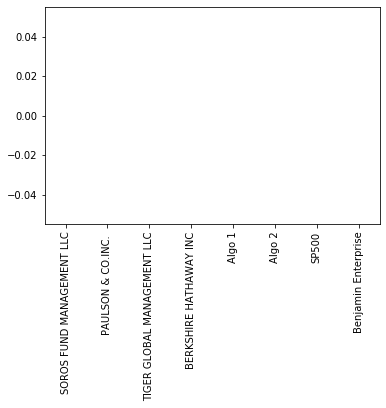

In [201]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_all_df.plot(kind="bar")

## Include correlation analysis to determine which stocks (if any) are correlated

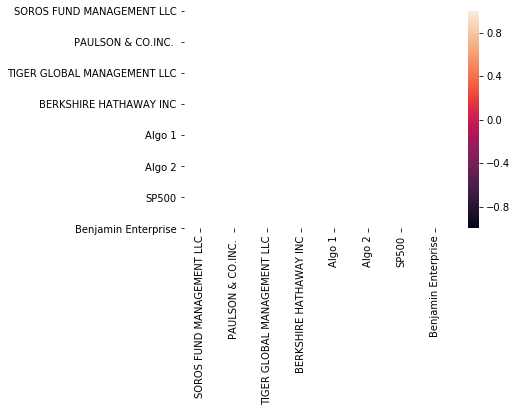

In [202]:
correlation = all_returns_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)